# **Customer Demographic Data Analysis**

The below is the analysis of the Customer Demographic data. The analysis includes reviewing the data and making necessary changes to clean the data

In [77]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns


/kaggle/input/kpmg-virtualinternship/KPMG (1).xlsx


In [78]:
RawData= pd.ExcelFile("/kaggle/input/kpmg-virtualinternship/KPMG (1).xlsx")

In [79]:
CustomerDemographic = pd.read_excel(RawData,'CustomerDemographic')

In [80]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

DOB is listed as object type.
Need to change into Date type

In [81]:
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])
#print(CustomerDemographic)
print (CustomerDemographic.dtypes)

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object


In [82]:
CustomerDemographic.duplicated().sum()

0

In [83]:
#Checking for null values
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

**5 Columns have null values**

In [84]:
#Checking for uniqueness of each column
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

**6 Genders listed**

In [85]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [86]:
#change M to male and Femal,F to female and U as Unspecified
#df['column name'] = df['column name'].replace(['1st old value', '2nd old  value', ...]
CustomerDemographic['gender']= CustomerDemographic['gender'].replace(['F', 'Femal'],'Female').replace('M','Male')

In [87]:
CustomerDemographic['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [88]:
CustomerDemographic['past_3_years_bike_related_purchases'].value_counts().sort_index()

0     38
1     35
2     50
3     30
4     37
      ..
95    27
96    46
97    42
98    47
99    44
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [89]:
#group them into high med and low
CustomerDemographic['purchases_3_years'] = np.where(CustomerDemographic.past_3_years_bike_related_purchases <30, "low",
                                        np.where(CustomerDemographic.past_3_years_bike_related_purchases >60, "high","medium"))
CustomerDemographic['purchases_3_years'].value_counts()

high      1528
medium    1242
low       1230
Name: purchases_3_years, dtype: int64

In [90]:
CustomerDemographic['DOB'].value_counts().sort_index()

1843-12-21    1
1931-10-23    1
1935-08-22    1
1940-09-22    1
1943-08-11    1
             ..
2002-01-06    1
2002-01-09    1
2002-01-15    1
2002-01-26    1
2002-03-11    1
Name: DOB, Length: 3448, dtype: int64

**1843 is an anomaly and needs to be corrected**

In [91]:
CustomerDemographic['DOB']=CustomerDemographic['DOB'].replace("1843-12-21", "1943-12-21")

In [92]:
CustomerDemographic['DOB'].value_counts().sort_index()

1931-10-23    1
1935-08-22    1
1940-09-22    1
1943-08-11    1
1943-12-21    1
             ..
2002-01-06    1
2002-01-09    1
2002-01-15    1
2002-01-26    1
2002-03-11    1
Name: DOB, Length: 3448, dtype: int64

*Could Group the DOB into age groups*

In [93]:
from datetime import date

In [94]:
# Calculate age based on the current year
current_year = pd.to_datetime('today').year
CustomerDemographic['Age'] = current_year - CustomerDemographic['DOB'].dt.year


# Print the modified DataFrame
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,purchases_3_years,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,high,70.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,high,43.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,high,69.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,medium,62.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,medium,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,low,48.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,high,22.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,medium,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,low,50.0


NaT value is not needed
Drop the NaT

In [96]:
CustomerDemographic = CustomerDemographic.drop(CustomerDemographic[CustomerDemographic['DOB'] == 'NaT'].index)

In [97]:
# create the age group

CustomerDemographic["age_group"] = np.where(CustomerDemographic['Age'] <30 ,  "Young",
                                np.where((CustomerDemographic['Age'] >30) & (CustomerDemographic['Age'] <60), "Adult", "Senior Citizen"))

In [98]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,purchases_3_years,Age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,high,70.0,Senior Citizen
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,high,43.0,Adult
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,high,69.0,Senior Citizen
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,medium,62.0,Senior Citizen
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,medium,46.0,Adult


In [99]:
CustomerDemographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

**Add the missing values as "Other"**

In [101]:
CustomerDemographic['job_title'] = CustomerDemographic['job_title'].fillna("Other")
CustomerDemographic['job_title'].value_counts()

Other                                   506
Business Systems Development Analyst     45
Tax Accountant                           44
Social Worker                            44
Internal Auditor                         42
                                       ... 
Database Administrator I                  4
Health Coach I                            3
Health Coach III                          3
Research Assistant III                    3
Developer I                               1
Name: job_title, Length: 196, dtype: int64

In [102]:
CustomerDemographic['job_industry_category'].value_counts()


Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

**Add the missing values as "Other"**

In [103]:
CustomerDemographic['job_industry_category'] = CustomerDemographic['job_industry_category'].fillna("Other")
CustomerDemographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Other                 656
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [104]:
CustomerDemographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [105]:
CustomerDemographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [106]:
CustomerDemographic['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [107]:
CustomerDemographic['tenure'].value_counts().sort_index()

1.0     166
2.0     150
3.0     160
4.0     191
5.0     228
6.0     192
7.0     235
8.0     211
9.0     200
10.0    218
11.0    221
12.0    202
13.0    191
14.0    200
15.0    179
16.0    215
17.0    182
18.0    208
19.0    159
20.0     96
21.0     54
22.0     55
Name: tenure, dtype: int64

**Group the Tenure into Equal half year groups**

In [108]:

CustomerDemographic["tenure_group"] = np.where(CustomerDemographic['tenure'] <6.0, "0-6 Months", 
                                np.where((CustomerDemographic['tenure'] >6.0) & (CustomerDemographic['tenure']<12.0), "6-12 Months", 
                                        np.where((CustomerDemographic['tenure'] > 12.0) & (CustomerDemographic['tenure'] <18.0), "12-18 Months",
                                                "18-24 Months")))

In [109]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,purchases_3_years,Age,age_group,tenure_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,high,70.0,Senior Citizen,6-12 Months
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,high,43.0,Adult,12-18 Months
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,high,69.0,Senior Citizen,12-18 Months
3,4,Talbot,NaN,Male,33,1961-10-03,Other,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,medium,62.0,Senior Citizen,6-12 Months
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Other,Affluent Customer,N,NIL,Yes,8.0,medium,46.0,Adult,6-12 Months


In [110]:
CustomerDemographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

**Inconsistent values so need to drop the column**

In [111]:
CustomerDemographic = CustomerDemographic.drop('default', axis=1)

In [112]:

CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,purchases_3_years,Age,age_group,tenure_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,high,70.0,Senior Citizen,6-12 Months
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,high,43.0,Adult,12-18 Months
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,high,69.0,Senior Citizen,12-18 Months
3,4,Talbot,NaN,Male,33,1961-10-03,Other,IT,Mass Customer,N,No,7.0,medium,62.0,Senior Citizen,6-12 Months
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Other,Affluent Customer,N,Yes,8.0,medium,46.0,Adult,6-12 Months


# Graphical Representation

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

**Age Range**

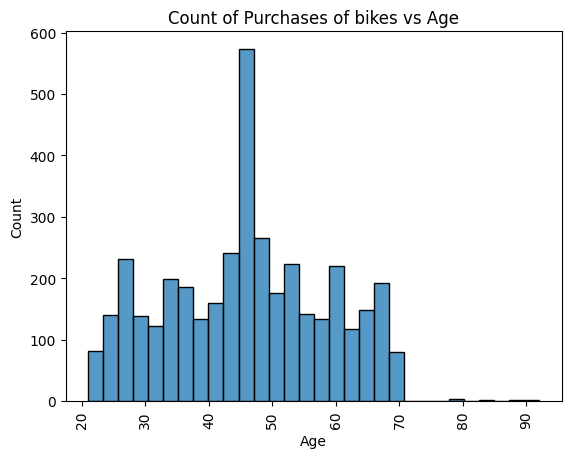

In [113]:
# Create a bar chart of age vs count using Seaborn
sns.histplot(x='Age', data=CustomerDemographic, edgecolor='black')

# Set the plot title and axis labels
plt.title('Count of Purchases of bikes vs Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

**Tenure Range**

Text(0.5, 1.0, 'Count of Bike Purchases vs Tenure of Customers')

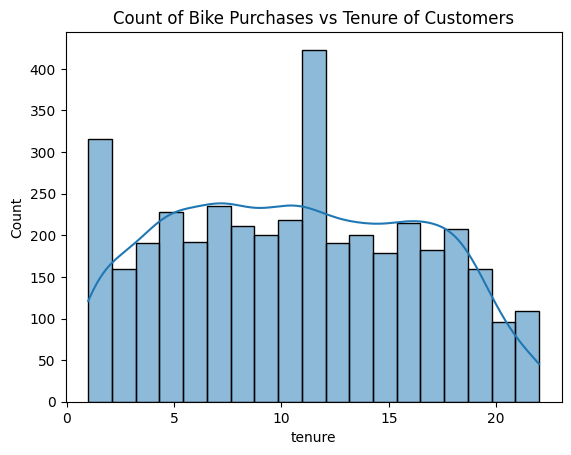

In [114]:
# histogram of tenure data using different code
sns.histplot(data=CustomerDemographic, x="tenure", kde=True)
plt.title('Count of Bike Purchases vs Tenure of Customers')